In [1]:
import feedparser
from pprint import pprint

import config

from tqdm import tqdm

In [2]:
links = list((config.rss_links).values())

In [3]:
# def process_posts_alt(newsfeed_obj):
#     return [post for post in newsfeed_obj.entries]

def process_posts(newsfeed_obj):
    for post in newsfeed_obj.entries:
        posts_dict = {}
        posts_dict['title'] = post.title
        posts_dict['link'] = post.link
#         posts_dict['summary_detail'] = post.summary
        posts_dict['published'] = post.published
        try:
            posts_dict['author'] = post.authors
        except:
            pass
        postmaster.append(posts_dict)

In [4]:
# extract rss feeds and push to a list

postmaster = []

for link in tqdm(links):
#     print(link)
    entries_list = process_posts(feedparser.parse(link))
    postmaster.append(entries_list)

100%|██████████| 19/19 [00:21<00:00,  1.12s/it]


In [5]:
# clean NoneType entries
postmaster = [posts for posts in postmaster if posts is not None]

In [6]:
# get titles
titles_list = list(set([post['title'] for post in postmaster]))

In [7]:
len(titles_list)

1632

In [8]:
titles_list[:20]

["From Rahul Dravid To Shah Rukh Khan: Who's Who Of India Invited For Modi's Swearing-In",
 'A.P. records highest-ever daily toll of 108',
 'PIL against Central Vista: Centre bats in favour of construction; court adjourns matter for tomorrow',
 'Arbitration case: Cairn digs in heels, PSBs say prepared for legal battle',
 "COVID-19: Delhi's positivity rate comes down from 36% to 19%",
 'Old SpaceX Clip Shared As Chinese Rocket Falling Into Indian Ocean',
 "'I was a bit nervous about wearing a bikini'",
 'Appeal to ULFA(I) chief to abjure violence: Himanta',
 'Chhatarpur centre opens, but only for those already registered',
 'NYSE-listed Startek prunes net loss to $12.2 million in first quarter',
 'Covaxin rates: Rs 600 for states; Rs 1,200 for hospitals',
 'Never break Covid-19 protocols of other countries: Rijiju to athletes',
 'Price, distribution: States want clarity from Centre',
 "ICC WTC final: Our fast bowlers enjoy each other's success, says Shami",
 'Cloudburst in Uttarakhand’s

In [9]:
# sentence embeddings

In [10]:
from sentence_transformers import SentenceTransformer

In [11]:
model = SentenceTransformer('stsb-distilroberta-base-v2')

In [12]:
embeddings = model.encode(titles_list, show_progress_bar=True)

In [13]:
# dimensionality reduction

In [14]:
import umap

In [15]:
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(embeddings)

In [16]:
# cluster

In [17]:
import numpy

In [18]:
numpy.__version__

'1.20.3'

In [19]:
import hdbscan

In [20]:
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

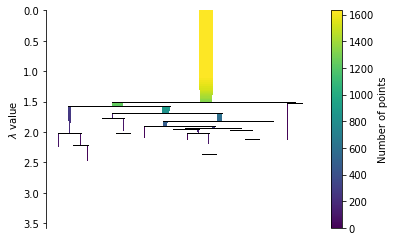

In [21]:
cluster.condensed_tree_.plot()

In [ ]:
for postslist in postmaster:
    if postslist:
        print([key for key in postslist[0].keys()])

In [ ]:
source_list = ['TOI India',
'TOI Most Recent Stories',
'TOI World',
'NDTV',
'India Today',
'The Indian Express General Feed',
'The Indian Express Front Page Feed',
'The Hindu National Feed',
'The Hindu Default feed',
'News18',
'Business Standard',
'DNA India',
'Deccan Chronicle',
'Scroll',
'Financial Express',
'The Hindu Business Line',
'Free Press Journal',
'Outlook India',
'The Quint']

links_list = ['http://timesofindia.indiatimes.com/rssfeeds/-2128936835.cms',
'http://timesofindia.indiatimes.com/rssfeeds/1221656.cms',
'http://timesofindia.indiatimes.com/rssfeeds/296589292.cms',
'http://feeds.feedburner.com/NDTV-LatestNews',
'https://www.indiatoday.in/rss/1206578',
'https://indianexpress.com/feed/',
'https://indianexpress.com/print/front-page/feed/',
'https://www.thehindu.com/news/national/?service=rss',
'https://www.thehindu.com/news/feeder/default.rss',
'http://www.news18.com/rss/india.xml',
'https://www.business-standard.com/rss/latest.rss',
'https://www.dnaindia.com/feeds/india.xml',
'https://www.deccanchronicle.com/rss_feed/',
'http://feeds.feedburner.com/ScrollinArticles.rss',
'http://www.financialexpress.com/feed',
'https://www.thehindubusinessline.com/?service=rss',
'https://prod-qt-images.s3.amazonaws.com/production/freepressjournal/feed.xml',
'http://www.outlookindia.com/rss/home',
'https://prod-qt-images.s3.amazonaws.com/production/thequint/feed.xml']

sources = dict(zip(source_list, links_list))

In [ ]:
sources

In [ ]:
# check rss feed links

links_to_check = ['http://timesofindia.indiatimes.com/rssfeeds/-2128936835.cms',
'http://timesofindia.indiatimes.com/rssfeeds/1221656.cms',
'http://timesofindia.indiatimes.com/rssfeeds/296589292.cms',
'http://feeds.feedburner.com/NDTV-LatestNews',
'https://www.indiatoday.in/rss/1206578',
'https://indianexpress.com/feed/',
'https://indianexpress.com/print/front-page/feed/',
'https://www.thehindu.com/news/national/?service=rss',
'https://www.thehindu.com/news/feeder/default.rss',
'http://www.news18.com/rss/india.xml',
'https://www.business-standard.com/rss/latest.rss',
'https://www.dnaindia.com/feeds/india.xml',
'https://www.deccanchronicle.com/rss_feed/',
'http://feeds.feedburner.com/ScrollinArticles.rss',
'http://www.financialexpress.com/feed',
'https://www.thehindubusinessline.com/?service=rss',
'https://prod-qt-images.s3.amazonaws.com/production/freepressjournal/feed.xml',
'http://www.outlookindia.com/rss/home',
'https://prod-qt-images.s3.amazonaws.com/production/thequint/feed.xml']

def check_feed(link):
    print(link)
    print(len(feedparser.parse(link).entries))
    print('------------------------')
    
for link in links_to_check:
    check_feed(link)
    

In [ ]:
sources = dict(zip(source_list, links_list))

In [ ]:
# toi_link = 'http://timesofindia.indiatimes.com/rssfeeds/-2128936835.cms' 15 india
# toi_link = 'http://timesofindia.indiatimes.com/rssfeeds/1221656.cms' 19 most recent stories
# toi_link = 'http://timesofindia.indiatimes.com/rssfeeds/296589292.cms' 20 world
toi_link = 'http://timesofindia.indiatimes.com/rssfeeds/-2128936835.cms'
len(feedparser.parse(toi_link).entries)

In [ ]:
len(feedparser.parse('https://www.thehindu.com/news/feeder/default.rss').entries)

In [ ]:
ie_link = 'https://indianexpress.com/print/front-page/feed/'
feedparser.parse(ie_link)

In [ ]:
len(feedparser.parse(ie_link).entries)

In [ ]:
ie_link_generic = 'https://indianexpress.com/feed/'
feedparser.parse(ie_link_generic)

In [ ]:
# NewsFeed = feedparser.parse('https://www.thehindu.com/news/feeder/default.rss')
NewsFeed

In [ ]:
NewsFeed.entries[0]

In [ ]:
postmaster = []

for post in NewsFeed.entries:
    posts_dict = {}
    print(post.title)
    posts_dict['title'] = post.title
    posts_dict['authors'] = post.authors
    posts_dict['link'] = post.link
    posts_dict['summary'] = post.summary
    posts_dict['published'] = post.published
    
    postmaster.append(posts_dict)
    print('----------------------')
    

In [ ]:
pprint(postmaster[:5])

In [ ]:
len(postmaster)